In [1]:
import pandas as pd
import snowflake.connector
import matplotlib.pyplot as plt
import seaborn as sns
import yaml

In [2]:
import yaml

yaml_path = r"C:\Users\Paul Tandazo\Desktop\PSET1-datamining\tuberias-deber\io_config.yaml"

with open(yaml_path, "r") as file:
    config = yaml.safe_load(file)

sf_config = config.get("default", {})


In [4]:
# Conectar a Snowflake
conn = snowflake.connector.connect(
    user=sf_config["SNOWFLAKE_USER"],
    password=sf_config["SNOWFLAKE_PASSWORD"],
    account=sf_config["SNOWFLAKE_ACCOUNT"],
    warehouse=sf_config["SNOWFLAKE_DEFAULT_WH"],
    database="INSTACART_DB",
    schema="CLEAN",
    role=sf_config["SNOWFLAKE_ROLE"]
)

cur = conn.cursor()
cur.execute("SELECT CURRENT_VERSION()")
print("Conectado a Snowflake - Versión:", cur.fetchone()[0])

Conectado a Snowflake - Versión: 9.2.8


,day_of_week,num_orders
0,0,78749
1,1,77269
2,2,61925
3,3,57271
4,4,56395
5,5,59907
6,6,58619


C:\Users\Paul Tandazo\AppData\Local\Temp\ipykernel_26660\4260278750.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="day_of_week", y="num_orders", data=df_orders_by_day, palette="viridis")


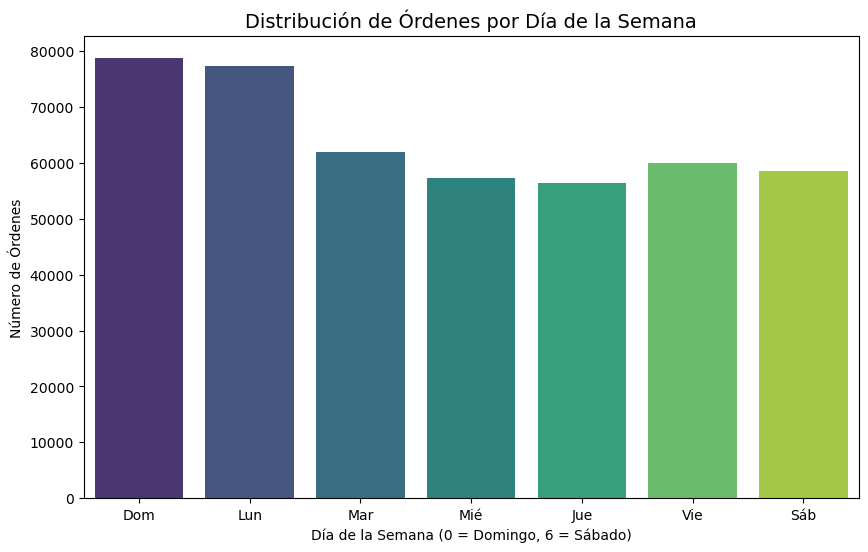

In [5]:
#Comportamiento de compra según día de la semana
query = """
    SELECT "order_dow", COUNT(*) AS num_orders
    FROM FACT_INSTACART_ORDERS
    GROUP BY "order_dow"
    ORDER BY "order_dow"
"""
cur.execute(query)

#Crear un datafram
df_orders_by_day = pd.DataFrame(cur.fetchall(), columns=["day_of_week", "num_orders"])
display(df_orders_by_day)

#Visualización de la distribución de órdenes por día de la semana
plt.figure(figsize=(10, 6))
sns.barplot(x="day_of_week", y="num_orders", data=df_orders_by_day, palette="viridis")
plt.title("Distribución de Órdenes por Día de la Semana", fontsize=14)
plt.xlabel("Día de la Semana (0 = Domingo, 6 = Sábado)")
plt.ylabel("Número de Órdenes")
plt.xticks(ticks=range(7), labels=["Dom", "Lun", "Mar", "Mié", "Jue", "Vie", "Sáb"])
plt.show()



,hour_of_day,num_orders
0,0,2963
1,1,1673
2,2,928
3,3,719
4,4,711
5,5,1282
6,6,3997
7,7,12402
8,8,23717
9,9,33865


C:\Users\Paul Tandazo\AppData\Local\Temp\ipykernel_6200\1767153136.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hour_of_day", y="num_orders", data=df_orders_by_hour, palette="viridis")


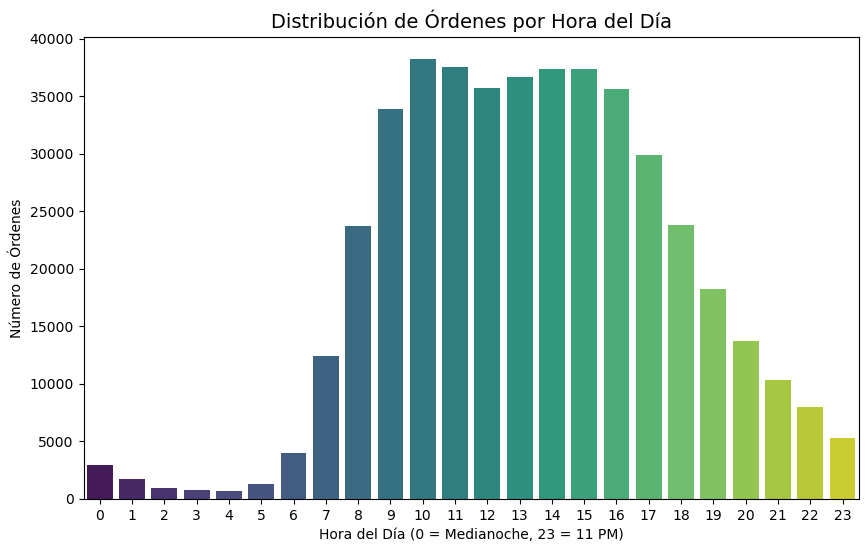

In [32]:
#Comportamiento de compra según hora del día
query = """
    SELECT "order_hour_of_day", COUNT(*) AS num_orders
    FROM FACT_INSTACART_ORDERS
    GROUP BY "order_hour_of_day"
    ORDER BY "order_hour_of_day"
"""
cur.execute(query)

#Crear un dataframe con los resultados
df_orders_by_hour = pd.DataFrame(cur.fetchall(), columns=["hour_of_day", "num_orders"])
display(df_orders_by_hour)

#Visualización de la distribución de órdenes por hora del día
plt.figure(figsize=(10, 6))
sns.barplot(x="hour_of_day", y="num_orders", data=df_orders_by_hour, palette="viridis")
plt.title("Distribución de Órdenes por Hora del Día", fontsize=14)
plt.xlabel("Hora del Día (0 = Medianoche, 23 = 11 PM)")
plt.ylabel("Número de Órdenes")
plt.xticks(ticks=range(0, 24, 1))  # Mostrar todas las horas
plt.show()


,day_of_week,hour_of_day,num_orders
0,0,0,500
1,0,1,325
2,0,2,177
3,0,3,121
4,0,4,105
...,...,...,...
163,6,19,2447
164,6,20,1731
165,6,21,1383
166,6,22,1111


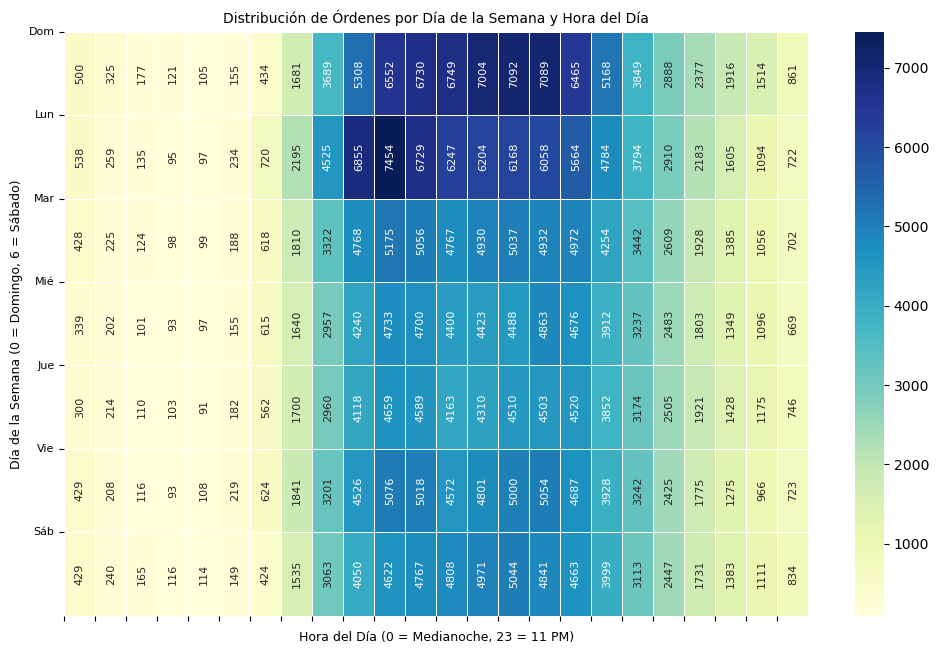

In [39]:
#Comportamiento según hora del día y día de la semana
query = """
    SELECT "order_dow", "order_hour_of_day", COUNT(*) AS num_orders
    FROM FACT_INSTACART_ORDERS
    GROUP BY "order_dow", "order_hour_of_day"
    ORDER BY "order_dow", "order_hour_of_day"
"""
cur.execute(query)

#Crear un dataframe con los resultados
df_orders_by_day_hour = pd.DataFrame(cur.fetchall(), columns=["day_of_week", "hour_of_day", "num_orders"])
display(df_orders_by_day_hour)

#Visualización de la distribución de órdenes por hora del día y día de la semana usando un heatmap
plt.figure(figsize=(12, 8))

# Crear la tabla pivote con los datos
pivot_table = df_orders_by_day_hour.pivot(index="day_of_week", columns="hour_of_day", values="num_orders")

# Crear el heatmap con el tamaño de fuente reducido en las celdas
sns.heatmap(pivot_table, cmap="YlGnBu", annot=True, fmt="d", linewidths=0.5,
            annot_kws={"size": 8, "rotation": 90})  # Rotar los valores dentro de las celdas a 90 grados
plt.title("Distribución de Órdenes por Día de la Semana y Hora del Día", fontsize=10)  # Tamaño de fuente reducido
plt.xlabel("Hora del Día (0 = Medianoche, 23 = 11 PM)", fontsize=9)  # Tamaño de fuente reducido
plt.ylabel("Día de la Semana (0 = Domingo, 6 = Sábado)", fontsize=9)  # Tamaño de fuente reducido

# Ajustar la visibilidad de las horas en el eje X y rotarlas
plt.xticks(ticks=range(0, 24, 1), fontsize=8, rotation=90)  # Rotar las horas a 90 grados
plt.yticks(ticks=range(7), labels=["Dom", "Lun", "Mar", "Mié", "Jue", "Vie", "Sáb"], rotation=0, fontsize=8)  # Rotar los días a 0 grados

# Aumentar el espacio en el gráfico para que no se sobrepongan las etiquetas de las horas
plt.subplots_adjust(bottom=0.15)

plt.show()


,user_id,num_orders
0,149605,28
1,193164,26
2,78375,25
3,148162,24
4,134511,24
...,...,...
149592,3631,1
149593,148153,1
149594,44985,1
149595,169690,1


Clientes con más de 100 órdenes: 0
Promedio de órdenes por cliente: 3.01


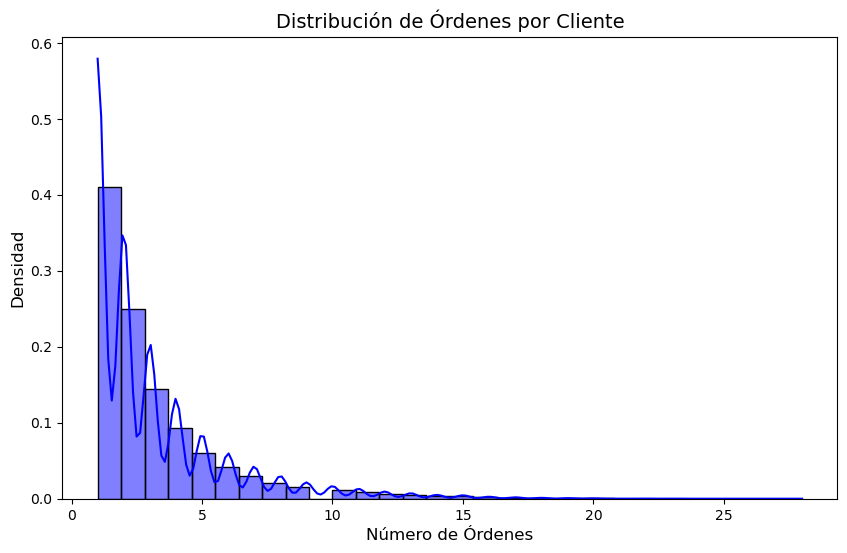

In [42]:
#Consulta para obtener el número de órdenes por cliente (usando user_id en lugar de customer_id)
query = """
    SELECT "user_id", COUNT(*) AS num_orders
    FROM FACT_INSTACART_ORDERS
    GROUP BY "user_id"
    ORDER BY num_orders DESC
"""
cur.execute(query)

#Crear un dataframe con los resultados
df_orders_by_customer = pd.DataFrame(cur.fetchall(), columns=["user_id", "num_orders"])

#Mostrar las primeras filas del dataframe
display(df_orders_by_customer)

#Número de clientes que hicieron más de X órdenes (por ejemplo, más de 100)
num_clients_more_than_100_orders = df_orders_by_customer[df_orders_by_customer["num_orders"] > 100].shape[0]
print(f"Clientes con más de 100 órdenes: {num_clients_more_than_100_orders}")

#Calcular el número promedio de órdenes por cliente
average_orders_per_customer = df_orders_by_customer["num_orders"].mean()
print(f"Promedio de órdenes por cliente: {average_orders_per_customer:.2f}")

#Visualización de la distribución de órdenes por cliente
plt.figure(figsize=(10, 6))
sns.histplot(df_orders_by_customer["num_orders"], bins=30, kde=True, color="blue", stat="density")
plt.title("Distribución de Órdenes por Cliente", fontsize=14)
plt.xlabel("Número de Órdenes", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.show()


,product_name,num_occurrences
0,Banana,66046
1,Bag of Organic Bananas,53295
2,Organic Strawberries,37035
3,Organic Baby Spinach,33970
4,Organic Hass Avocado,29772
5,Organic Avocado,24689
6,Large Lemon,21495
7,Strawberries,20017
8,Limes,19689
9,Organic Whole Milk,19600


C:\Users\Paul Tandazo\AppData\Local\Temp\ipykernel_6200\1203452168.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="num_occurrences", y="product_name", data=df_top_20_products, palette="viridis")


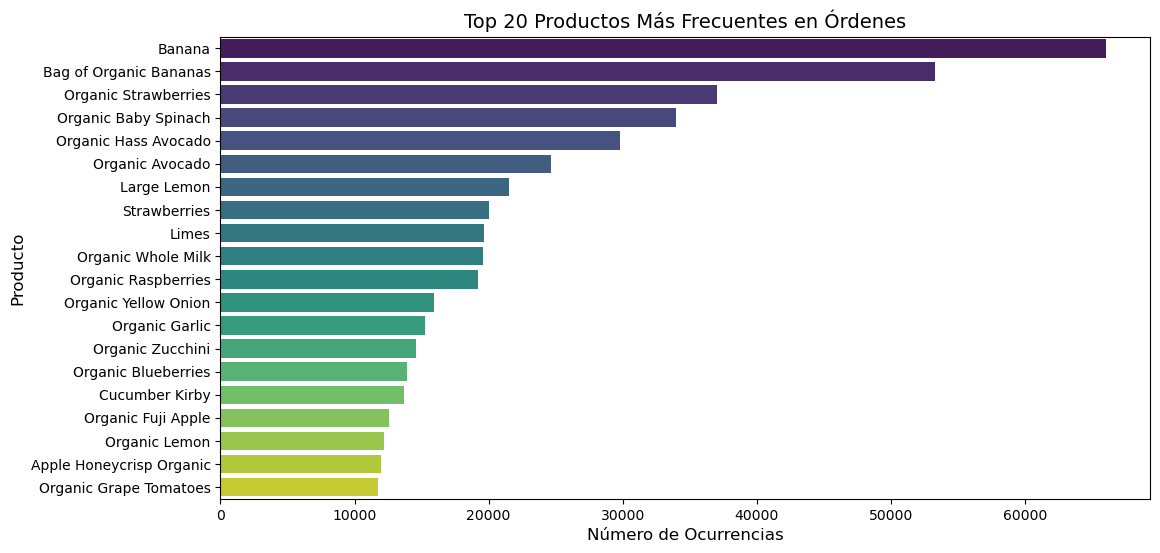

In [43]:
#Consulta para obtener los 20 productos más frecuentes en las órdenes
query = """
    SELECT p."product_name", COUNT(*) AS num_occurrences
    FROM FACT_ORDER_PRODUCTS fop
    JOIN DIM_PRODUCTS p ON fop."product_id" = p."product_id"
    GROUP BY p."product_name"
    ORDER BY num_occurrences DESC
    LIMIT 20
"""
cur.execute(query)

#Crear un dataframe con los resultados
df_top_20_products = pd.DataFrame(cur.fetchall(), columns=["product_name", "num_occurrences"])

#Mostrar los resultados
display(df_top_20_products)

#Visualización de los productos más frecuentes
plt.figure(figsize=(12, 6))
sns.barplot(x="num_occurrences", y="product_name", data=df_top_20_products, palette="viridis")
plt.title("Top 20 Productos Más Frecuentes en Órdenes", fontsize=14)
plt.xlabel("Número de Ocurrencias", fontsize=12)
plt.ylabel("Producto", fontsize=12)
plt.show()


,order_id,num_products
0,2141543,20
1,567889,26
2,2571142,12
3,644579,22
4,3185766,28
...,...,...
450041,2061877,1
450042,2086930,1
450043,1790509,1
450044,812418,1


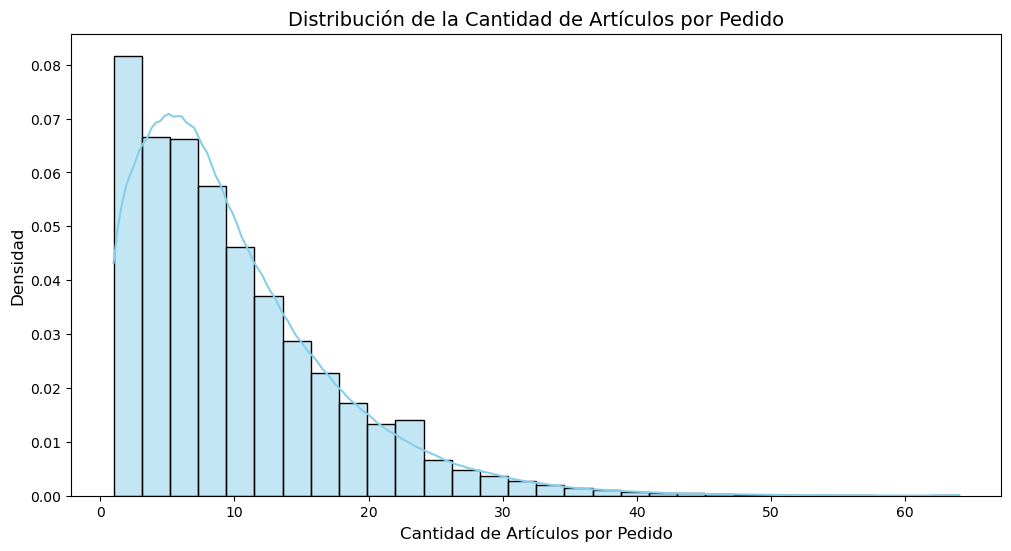

Promedio de artículos por pedido: 10.10


In [65]:
#Consulta para obtener la cantidad de productos por orden
query = """
    SELECT "order_id", COUNT(*) AS num_products
    FROM FACT_ORDER_PRODUCTS
    GROUP BY "order_id"
"""
cur.execute(query)

#Crear un dataframe con los resultados
df_order_product_count = pd.DataFrame(cur.fetchall(), columns=["order_id", "num_products"])

#Mostrar la distribución de la cantidad de artículos por orden
display(df_order_product_count)

#Visualización de la distribución de la cantidad de productos por orden
plt.figure(figsize=(12, 6))
sns.histplot(df_order_product_count["num_products"], bins=30, kde=True, color="skyblue", stat="density")
plt.title("Distribución de la Cantidad de Artículos por Pedido", fontsize=14)
plt.xlabel("Cantidad de Artículos por Pedido", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.show()

#Calcular la cantidad promedio de productos por orden
average_num_products = df_order_product_count["num_products"].mean()
print(f"Promedio de artículos por pedido: {average_num_products:.2f}")


,product_name,reorder_count
0,Banana,55761
1,Bag of Organic Bananas,44448
2,Organic Strawberries,28637
3,Organic Baby Spinach,26232
4,Organic Hass Avocado,23628
5,Organic Avocado,18743
6,Organic Whole Milk,16251
7,Large Lemon,15044
8,Organic Raspberries,14747
9,Strawberries,13944


C:\Users\Paul Tandazo\AppData\Local\Temp\ipykernel_6200\1012945021.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="reorder_count", y="product_name", data=df_top_reordered_products, palette="viridis")


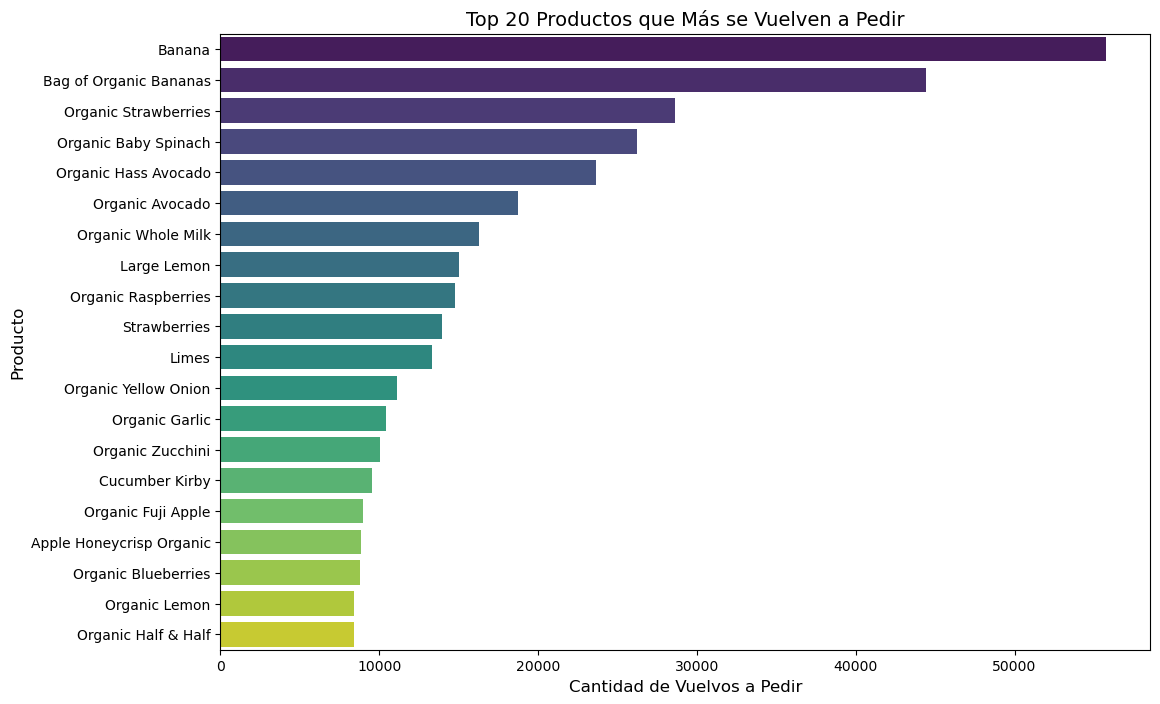

In [46]:
#Consulta para obtener los productos con mayor índice de reorder
query = """
    SELECT p."product_name", COUNT(*) AS reorder_count
    FROM FACT_ORDER_PRODUCTS op
    JOIN DIM_PRODUCTS p ON op."product_id" = p."product_id"
    WHERE op."reordered" = 1
    GROUP BY p."product_name"
    ORDER BY reorder_count DESC
    LIMIT 20
"""
cur.execute(query)

#Crear un dataframe con los resultados
df_top_reordered_products = pd.DataFrame(cur.fetchall(), columns=["product_name", "reorder_count"])

#Mostrar los productos más frecuentes que se vuelven a pedir
display(df_top_reordered_products)

#Visualización de los productos que más se vuelven a pedir
plt.figure(figsize=(12, 8))
sns.barplot(x="reorder_count", y="product_name", data=df_top_reordered_products, palette="viridis")
plt.title("Top 20 Productos que Más se Vuelven a Pedir", fontsize=14)
plt.xlabel("Cantidad de Vuelvos a Pedir", fontsize=12)
plt.ylabel("Producto", fontsize=12)
plt.show()



In [ ]:
# Consulta para obtener el total de pedidos y el número de reordenes para cada producto
query = """
    SELECT p."product_name", 
           COUNT(*) AS total_orders,
           SUM(CASE WHEN op."reordered" = 1 THEN 1 ELSE 0 END) AS reorder_count
    FROM FACT_ORDER_PRODUCTS op
    JOIN DIM_PRODUCTS p ON op."product_id" = p."product_id"
    GROUP BY p."product_name"
"""
cur.execute(query)

# Crear un dataframe con los resultados
df_product_reorder_proportion = pd.DataFrame(cur.fetchall(), columns=["product_name", "total_orders", "reorder_count"])

# Calcular la proporción de reordenes
df_product_reorder_proportion["reorder_proportion"] = df_product_reorder_proportion["reorder_count"] / df_product_reorder_proportion["total_orders"]

# Mostrar la proporción de reordenes para cada producto
display(df_product_reorder_proportion)


,product_name,total_orders,reorder_count,reorder_proportion
0,Organic 2% Reduced Fat Milk,3241,2565,0.791422
1,Hass Avocados,7112,5287,0.743391
2,Natural Provolone Cheese Slices,107,52,0.485981
3,Whole Natural Value Pack Almonds,284,147,0.517606
4,Organic Roasted Turkey Breast,4098,2732,0.666667
...,...,...,...,...
44607,Beef & Bacon Flavor Dog Snacks,1,0,0.000000
44608,L'Orange Vodka,1,0,0.000000
44609,Organic Fresh Flax Oil,1,1,1.000000
44610,Vegan Rice Protein,1,0,0.000000


C:\Users\Paul Tandazo\AppData\Local\Temp\ipykernel_6200\54729311.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="reorder_proportion", y="product_name", data=df_top_reordered_products, palette="viridis")


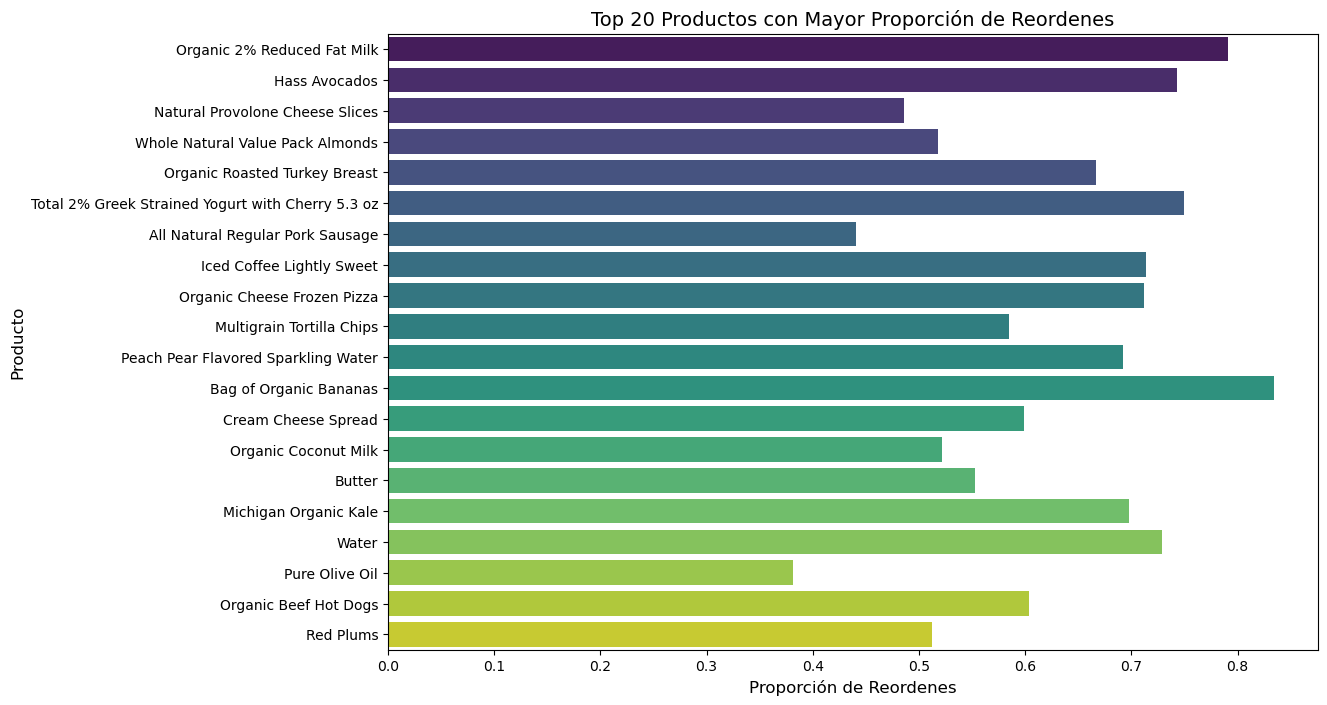

In [57]:
# Limitar a los 20 productos con mayor proporción de reorden
df_top_reordered_products = df_product_reorder_proportion.head(20)

# Visualización del gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x="reorder_proportion", y="product_name", data=df_top_reordered_products, palette="viridis")
plt.title("Top 20 Productos con Mayor Proporción de Reordenes", fontsize=14)
plt.xlabel("Proporción de Reordenes", fontsize=12)
plt.ylabel("Producto", fontsize=12)
plt.show()


,product_name,first_position_count
0,Banana,15562
1,Bag of Organic Bananas,11026
2,Organic Whole Milk,4363
3,Organic Strawberries,3946
4,Organic Hass Avocado,3390


C:\Users\Paul Tandazo\AppData\Local\Temp\ipykernel_6200\2060012416.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_20_first_position, x="first_position_count", y="product_name", palette="viridis")


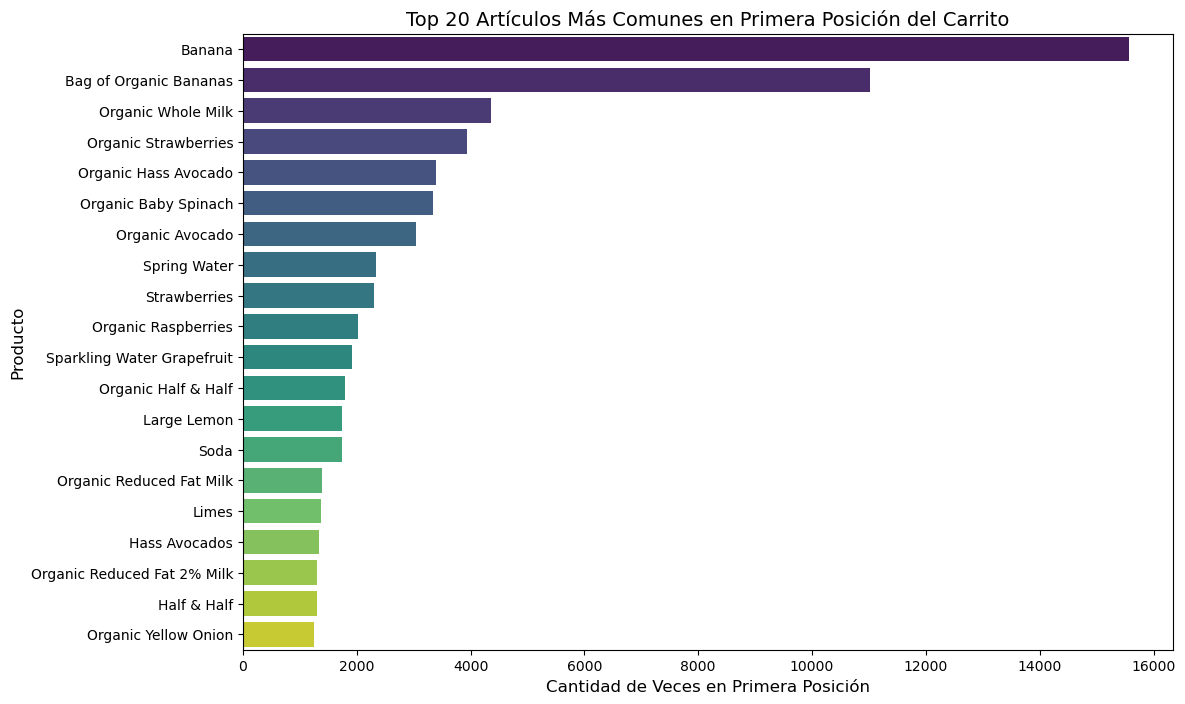

In [69]:
# Consulta SQL para obtener los top 20 artículos que la gente pone primero en el carrito
query = """
    SELECT
        p."product_name",
        COUNT(*) AS first_position_count
    FROM FACT_ORDER_PRODUCTS op
    JOIN DIM_PRODUCTS p ON op."product_id" = p."product_id"
    WHERE op."add_to_cart_order" = 1
    GROUP BY p."product_name"
    ORDER BY first_position_count DESC
    LIMIT 20;
"""

# Ejecutar la consulta
cur.execute(query)

# Obtener los resultados y crear un DataFrame
df_top_20_first_position = pd.DataFrame(cur.fetchall(), columns=["product_name", "first_position_count"])

# Mostrar los primeros registros
display(df_top_20_first_position.head())

# Visualización de los top 20 artículos más comunes en primera posición
plt.figure(figsize=(12, 8))
sns.barplot(data=df_top_20_first_position, x="first_position_count", y="product_name", palette="viridis")
plt.title("Top 20 Artículos Más Comunes en Primera Posición del Carrito", fontsize=14)
plt.xlabel("Cantidad de Veces en Primera Posición", fontsize=12)
plt.ylabel("Producto", fontsize=12)
plt.show()